In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import typing
from typing import Tuple
from mpl_toolkits import mplot3d

plotting utility

In [2]:
def plot_coordinates(x: np.ndarray, y: np.ndarray, z: np.ndarray):
    figure = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')
    ax.scatter(x, y, z)
    plt.show()

Naive Implementation (came up during the interview after many your many hints)
using a random phi and a random theta with the normalized unit radius `r = 1`
then convert it to cartesian coordinates `(x, y, z)`

In [3]:
def gen_uniform_random_spherical_coordinates_naive(n: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    phi = np.random.uniform(low=0, high=np.pi, size=n)
    theta = np.random.uniform(low=0, high=2 * np.pi, size=n)
    # conversion to cartesian coordinates, which I looked up
    # (source: https://math.libretexts.org/Bookshelves/Calculus/Book%3A_Calculus_(OpenStax)/12%3A_Vectors_in_Space/12.7%3A_Cylindrical_and_Spherical_Coordinates)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return x, y, z

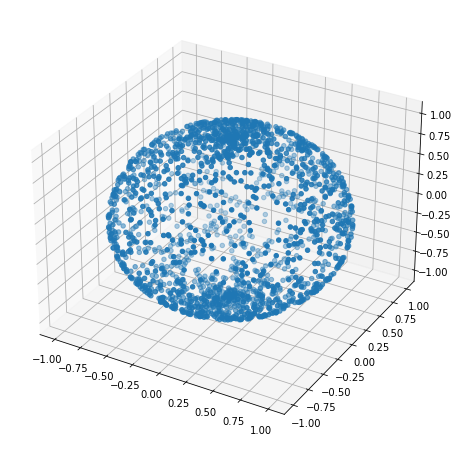

In [4]:
def naive_sample():
    # As shown in the 3d plotting, dots are more densely packed around the top and bottom of the sphere.
    # The textbook explanation is that this is due to the area element d Theta = sin(Phi) d Theta d Phi is
    # a function of phi. This is too abstract for me, however. To my understanding, the naive method picks
    # uniformly random points on different rings, whose radii vary from 0 to 1. Naturally,
    # as Phi gets closer to either 0 or pi, i.e., closer to the poles, the radius gets smaller as well,
    # and our Theta has less "power" over the uniformity of the data, because we are essentially picking random
    # elements from smaller sets.
    x, y, z = gen_uniform_random_spherical_coordinates_naive(2000)
    plot_coordinates(x, y, z)

naive_sample()

As shown in the 3d plotting, dots are more densely packed around the top and bottom of the sphere.
The textbook explanation is that this is due to the area element d Theta = sin(Phi) d Theta d Phi is
a function of phi. This is too abstract for me, however. To my understanding, the naive method picks
uniformly random points on different rings, whose radii vary from 0 to 1. Naturally,
as Phi gets closer to either 0 or pi, i.e., closer to the poles, the radius gets smaller as well,
and our Theta has less "power" over the uniformity of the data, because we are essentially picking random
elements from smaller sets.

Correct Implementation
Instead of thinking in terms of the coordinates, we could think in terms of areas.
The core of the problem is to generate uniformly random points on the "surface of a unit sphere",
which essentially asks us to evently divide the surface area of the sphere.
According to the Archimedes' Theorem, and a bit of 3D calculus, we know that `S = S1 = S2 = 2 * pi * R * h`
where S1 is the surface area of the sphere with radius R, and S2 is the lateral surface area of an enclosing cylinder
whose radius is R and height is h. The rolled out lateral surface of a cylinder is nothing but a rectangle of which
the uniform random point distribution is much more apparent. Thus, we can conclude that the true uniform random
distribution depends on not Phi, but the axis of formed by the two poles, with Theta unchanged.

In [5]:
def gen_uniform_random_sphereical_coordinates_archimede(n: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    z = np.random.uniform(low=-1, high=1, size=n)
    theta = np.random.uniform(low=0, high=2 * np.pi, size=n)
    phi = np.arccos(z)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    return x, y, z

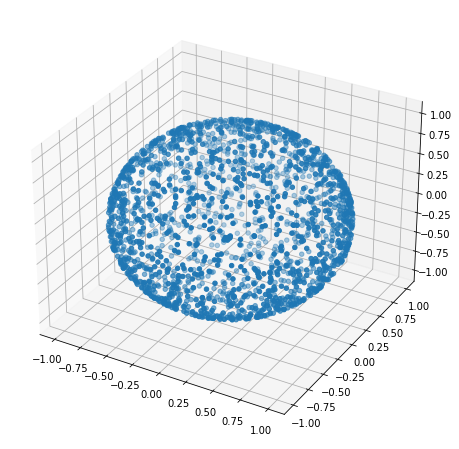

In [6]:
def correct_sample():
    x, y, z = gen_uniform_random_sphereical_coordinates_archimede(2000)
    plot_coordinates(x, y, z)

correct_sample()

As shown, the points are now evenly distributed.